Henry (Hank) Besser

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.max_rows = 12

### Problem under study: 

For this exercise there is the task of analyzing a non-equilibrium property of proteins, the diffusion of heat. This requires some knowledge about the foundations of statistical physics, but more pertinent to this exercise, is intuitively understanding the results of a pre-run molecular dynamics simulation. 

The objective is to determine the thermal diffusivity of the system.For the pre-run simulation, the temperature in the outer layer of the water sphere is 200 K, while the rest of the bubble has a temperature of 300 K. By exploring the change of the system’s temperature and comparing it to the theoretical expression, the thermal diffusivity will determined.

#### Heat diffusion:

Time dependence of temperature $T(\vec{r}, t)$
is controlled by the heat diffusion equation:

$$ Equation 1:\\  \frac{\partial T(\vec{r}, t)}{\partial t} = D \nabla^2 T(\vec{r}, t) $$


This is affected by initial and boundary conditions, for a sphere of
radius $R$.

The average temperature of this system that depends on time is:

$$ Equation 2:  T(t) - T_{bath} + 6* \frac{T_{sim}-T_{bath}}{\pi^2}\sum_{n=1}^{\infty} \frac{1}{n^2} exp[-(\frac{n\pi}{R})^2 Dt] $$


where $D$ is the thermal diffusivity, $T_{bath}$ = 200 K is the initial temperature of the sphere, and $T_{sim}$ =300 K is the temperature of the sphere’s boundary, and the sphere has a radius $R$ = 2.5 nm.

### Methods: Thorough Descriptions

Importing the data contained in an object and inspecting the content of the object 

In [2]:
load_data = np.loadtxt("temperature_log.txt")

For easy viewing, loading the imported imported into a pandas dataframe.


This is the raw data where the average temperature is extracted at every 25 steps (50 fs). Using molecular dynamics the simulation trajectory for this system is 10 ps using a 2 fs time steps.

In [3]:
time_steps_data_set = pd.DataFrame(load_data, columns=['Step Number [1 step = 2 fs]', 'Temperature [K]'])
time_steps_data_set

,Step Number [1 step = 2 fs],Temperature [K]
0,0.0,297.2882
1,25.0,276.7243
2,50.0,275.2291
3,75.0,271.8030
4,100.0,280.2518
5,125.0,273.5691
...,...,...
195,4875.0,207.6688
196,4900.0,209.3152
197,4925.0,212.5485


Now, making the dataframe represent the time of simulation instead of the step number for plotting purposes. This is easy as 1 step is equivalent to 2 fs. Therefore, multiplying the first (indexed) column in the data frame would accomplish this task. The total time of the extracted data (average temperature is extracted at every 50 fs) for the simulation to run is 10000 fs.

In [4]:
total_time_data_set = pd.DataFrame.from_items([('Time [fs}_____', load_data[:,0]*2),
                                               ('Temperature [K]',load_data[:,1])])
total_time_data_set

,Time [fs}_____,Temperature [K]
0,0.0,297.2882
1,50.0,276.7243
2,100.0,275.2291
3,150.0,271.8030
4,200.0,280.2518
5,250.0,273.5691
...,...,...
195,9750.0,207.6688
196,9800.0,209.3152
197,9850.0,212.5485


Calling the columns and assigning them explicit names to be stored as arrays for eventually plotting the simulation data.

In [5]:
x_to_fit = load_data[:,0]*2
y_to_fit = load_data[:,1]

### Analysis: explained methods for curve fitting and finding desired parameters

### Strategy for curve fiiting: scipy.optimize.curve_fit - General purpose curve fitting module interfaced to an efficient backend.

optimize.curve_fit- One of the methods SciPy provides for fitting a curve to data points. The fitted curve is a much cleaner way to represent the data.

Using `curve_fit()` to find the best fit for the parameters in the data. Inspecting the data, the curve is an exponential decay. Therefore the equation $y= a*\exp^(-b*d*x)+c$ , can be used as the function to optimize the curve. The method requires an initial guess for the parameters but as we are provided with all the parameters, besides the diffusion $D$ (represented by the $d$ in  the exponential function). $c$ is 200 (the exponential decay presumably converges to this value). The function is a function of x, where x is the time of the simulation (provided). $a$ was guessed to be around 60 from the $6* \frac{T_{sim}-T_{bath}}{pi^2}$ term. The last given parameter $b$ was harder to guess as it represents multiple constants in equation 2 but after some hand calculation this value induced optimal paramters with low error at around 0.0145.  

In [ ]:
from scipy.optimize import curve_fit

#The function and paremters previously descibed 
def func(x, a, b, c, d):
    return a*np.exp(-b*d*x)+c



# curve fit function takes 4 values
#1. The exponential function
#2. x_to_fit is the time of simulation  
#3. y_to_fit is the noisy data produced and in which we are trying to fit
#4. The initial guess of the 4 parameters in which the function of time depends on time

# The curve fit function returns two values (both in array form)
#1. p_est: Optimal values for the parameters 
#          so that the sum of the squared error is minimized  
#2. err_est: the covariance matrix of the estimates for the paramters,
#            The diagonals are the variances of the individual parameters.

p_est, err_est = curve_fit(func, x_to_fit, y_to_fit,[60.00,0.0146,200,0.095])    

## Results:

#### Plotting the optimal curve fit for the noisy average temperature data 

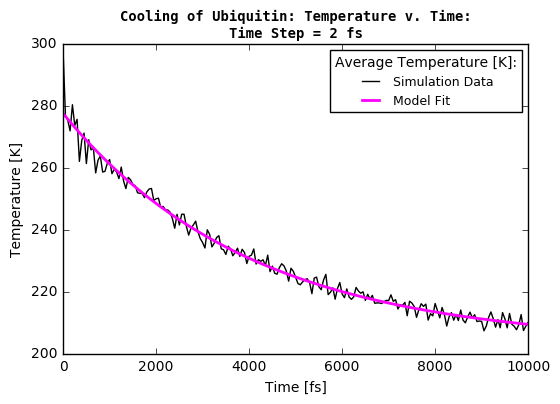

In [7]:
plt.figure()
ax = plt.gca()

plt.plot(x_to_fit, y_to_fit,color='black', markersize=8, linestyle='-')
plt.plot(x_to_fit, func(x_to_fit, *p_est), color='magenta', linewidth=2)
    
ax.set_xlabel("Time [fs]")
ax.set_ylabel("Temperature [K]")

ax.set_title('Cooling of Ubiquitin: Temperature v. Time:\n\
Time Step = 2 fs', family='monospace',size=10, weight='bold')

ax.legend(("Simulation Data", "Model Fit"),\
          title= 'Average Temperature [K]:', loc=1, fontsize=9)
plt.show()

### Figure 1: 

Cooling of ubiquitin in a water sphere. The magenta curve is the exponential fit of the noisy average temperature data [in K] to the expression represented by equation 2 (which a function dependent on time). Pre-run simulation details: The time step = 2 fs and average temperature is extracted at every 50 fs for this pre-run simulation.

#### Printing parameter estimates
#### The last value in the array p_est (parameter estimate) is the unscaled DIFFUSION Constant.

In [8]:
print("Parameter Estimate: {0}".format(p_est))

[  7.42342561e+01   5.86025146e-03   2.03183860e+02   4.23048332e-02]


- To get the thermal diffusivity parameter for comparing with the thermal diffusivity of water ($ D = 1.4 * 10^{ - 3} cm^{2} s^{ - 1}$)  Multiply the value of the $d$ (diffusivity) parameter by 0.1 to get the thermal diffusivity in $cm^2 s^{ - 1}$


- From the printed out array the thermal diffusivity parameter that optimally fits the curve is approximately 0.0423 and multiplying by 0.1 gives 0.00423 which is:


#### $D =  0.423*10^{ - 2} cm^{2} s^{ - 1}$ 

#### The amount of variation explained by the model ( given by the the diagonals of the covariance matrix) are minimal as all the parameters for the simulation --besides the thermal diffusivity parameter-- were provided. 

In [9]:
print("Covariance Matrix: {0}".format(err_est))

[[  6.20448523e-01  -1.83962071e-05  -4.85303294e-01  -3.78355499e-04]
 [ -4.15178329e-05  -8.69609686e+06   9.57930794e-05   6.27766452e+07]
 [ -4.85303294e-01   4.97200263e-05   8.09788191e-01   8.38191947e-04]
 [ -2.11441754e-04   6.27766452e+07   5.05593109e-04  -4.53181151e+08]]


#### Comparing the thermal diffusivity for this system 

(approximately $D =  0.423 * 10^{ - 2} cm^{2} s^{ - 1}$)  with the thermal diffusivity of water ($ D = 1.4 * 10^{ - 3} cm^{2} s^{ - 1}$)

This value for the thermal diffusivity for this system is approximately $3.2$ times larger thermal diffusivity of water larger than value for the thermal diffusivity of water. This makes sense as cooling of ubiquitin in a water is simulated, where an exponential average temperature drop is visualized in figure 1. The $T_{bath}$ = 200 K is the initial temperature of the sphere, and $T_{sim}$ =300 K is the temperature of the sphere’s boundary.

Last, Computing the thermal conductivity of the system, $K$:
$K=pc_{V}D$, 

where $c_{V}$ is the specific heat $(5050 J Kg^{-1}Kg^{-1})$ and $D$ is the thermal diffusivity. The density
of the system, $p$ is 1 g/mL.

Thermal conductivity of the system = $ 1*0.423*10^{-2} * 5050 $ $W/(mK)$ is approximately $21.36$ $W/(mK)$ 
